In [2]:
import pandas as pd
# Pandas is an open source Python package that is most widely used for
# data science/data analysis and machine learning tasks. 
import matplotlib.pyplot as plt
# matplotlib.pyplot is a state-based interface to matplotlib. 
# It provides an implicit, MATLAB-like, way of plotting.
import matplotlib.cm as cm
# Introduce colormaps
import seaborn as sns
# Seaborn is a Python data visualization library based on matplotlib
import numpy as np 
# Python draws on the power of NumPy
import itertools as it
# Itertools is a module in Python, 
# it is used to iterate over data structures 
# that can be stepped over using a for-loop
from sklearn.linear_model import LinearRegression 
# linear_model is a class of the sklearn module if contain,
# different functions for performing machine learning with linear models
from sklearn.metrics import mean_squared_error
# The sklearn. metrics module implements several loss, 
# score, and utility functions to measure classification performance
from sklearn.model_selection import train_test_split
# Model_selection is used to split our data into train and test sets,
# where feature variables are given as input in the method
from sklearn.linear_model import Lasso
# Lasso regression is a regularization technique, 
# It is used over regression methods for a more accurate prediction
from sklearn.neighbors import KNeighborsRegressor
# sklearn. neighbors provides functionality for,
# unsupervised and supervised neighbors-based learning methods
from sklearn.svm import SVR
# Support vector regression (SVR) is a statistical method,
# that examines the linear relationship between two continuous variables
from sklearn import metrics
# The sklearn. metrics module implements several loss, 
# score, and utility functions to measure classification performance
%matplotlib inline
#%matplotlib is a magic command which performs, 
#the necessary behind-the-scenes setup, 
#for IPython to work correctly hand-in-hand with matplotlib 
from sklearn.preprocessing import PolynomialFeatures
#Generate a new feature matrix consisting of all polynomial combinations, 
# of the features with degree less than or equal to the specified degree
import statsmodels.api as sm
# statsmodels is a Python module that provides classes and functions 
# for the estimation of many different statistical models, 
# as well as for conducting statistical tests, 
# and statistical data exploration

In [3]:
# Loading dataset
df=pd.read_csv('slump_test.csv', sep=',') # Create a dataframe
df.drop(columns=['No'], inplace=True)
df.head(10)   #Reading of first 10 rows

,Cement,Slag,Fly ash,Water,SP,Coarse Aggr.,Fine Aggr.,SLUMP(cm),FLOW(cm),Compressive Strength (28-day)(Mpa)
0,273.0,82.0,105.0,210.0,9.0,904.0,680.0,23.0,62.0,34.99
1,163.0,149.0,191.0,180.0,12.0,843.0,746.0,0.0,20.0,41.14
2,162.0,148.0,191.0,179.0,16.0,840.0,743.0,1.0,20.0,41.81
3,162.0,148.0,190.0,179.0,19.0,838.0,741.0,3.0,21.5,42.08
4,154.0,112.0,144.0,220.0,10.0,923.0,658.0,20.0,64.0,26.82
5,147.0,89.0,115.0,202.0,9.0,860.0,829.0,23.0,55.0,25.21
6,152.0,139.0,178.0,168.0,18.0,944.0,695.0,0.0,20.0,38.86
7,145.0,0.0,227.0,240.0,6.0,750.0,853.0,14.5,58.5,36.59
8,152.0,0.0,237.0,204.0,6.0,785.0,892.0,15.5,51.0,32.71
9,304.0,0.0,140.0,214.0,6.0,895.0,722.0,19.0,51.0,38.46


In [4]:
# Data Structuring
print('Number of rows',df.shape[0])
print('Number of columns',df.shape[1])
print(df.info())

Number of rows 103
Number of columns 10
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103 entries, 0 to 102
Data columns (total 10 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Cement                              103 non-null    float64
 1   Slag                                103 non-null    float64
 2   Fly ash                             103 non-null    float64
 3   Water                               103 non-null    float64
 4   SP                                  103 non-null    float64
 5   Coarse Aggr.                        103 non-null    float64
 6   Fine Aggr.                          103 non-null    float64
 7   SLUMP(cm)                           103 non-null    float64
 8   FLOW(cm)                            103 non-null    float64
 9   Compressive Strength (28-day)(Mpa)  103 non-null    float64
dtypes: float64(10)
memory usage: 8.2 KB
None


In [5]:
# Missing Values
print('Number of missing values', df.isnull().sum())
'The dataset contains no missing values'

Number of missing values Cement                                0
Slag                                  0
Fly ash                               0
Water                                 0
SP                                    0
Coarse Aggr.                          0
Fine Aggr.                            0
SLUMP(cm)                             0
FLOW(cm)                              0
Compressive Strength (28-day)(Mpa)    0
dtype: int64


'The dataset contains no missing values'

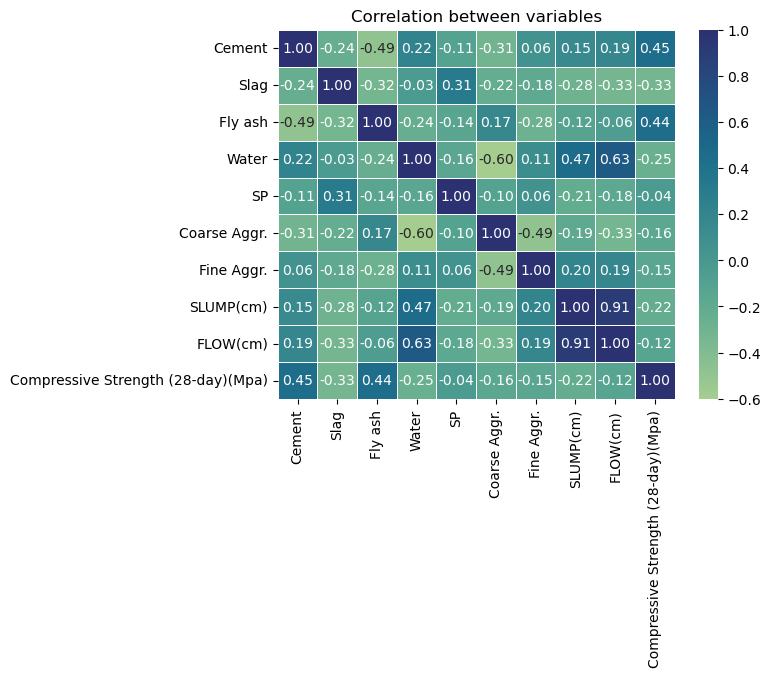

<Figure size 640x480 with 0 Axes>

In [7]:
# Data visualization 
#1 Correlation Matrix
sns.heatmap(df.corr(), annot=True, linewidth=.5,fmt=".2f",cmap="crest")
plt.title("Correlation between variables")
plt.show()
plt.savefig("figure.pdf")

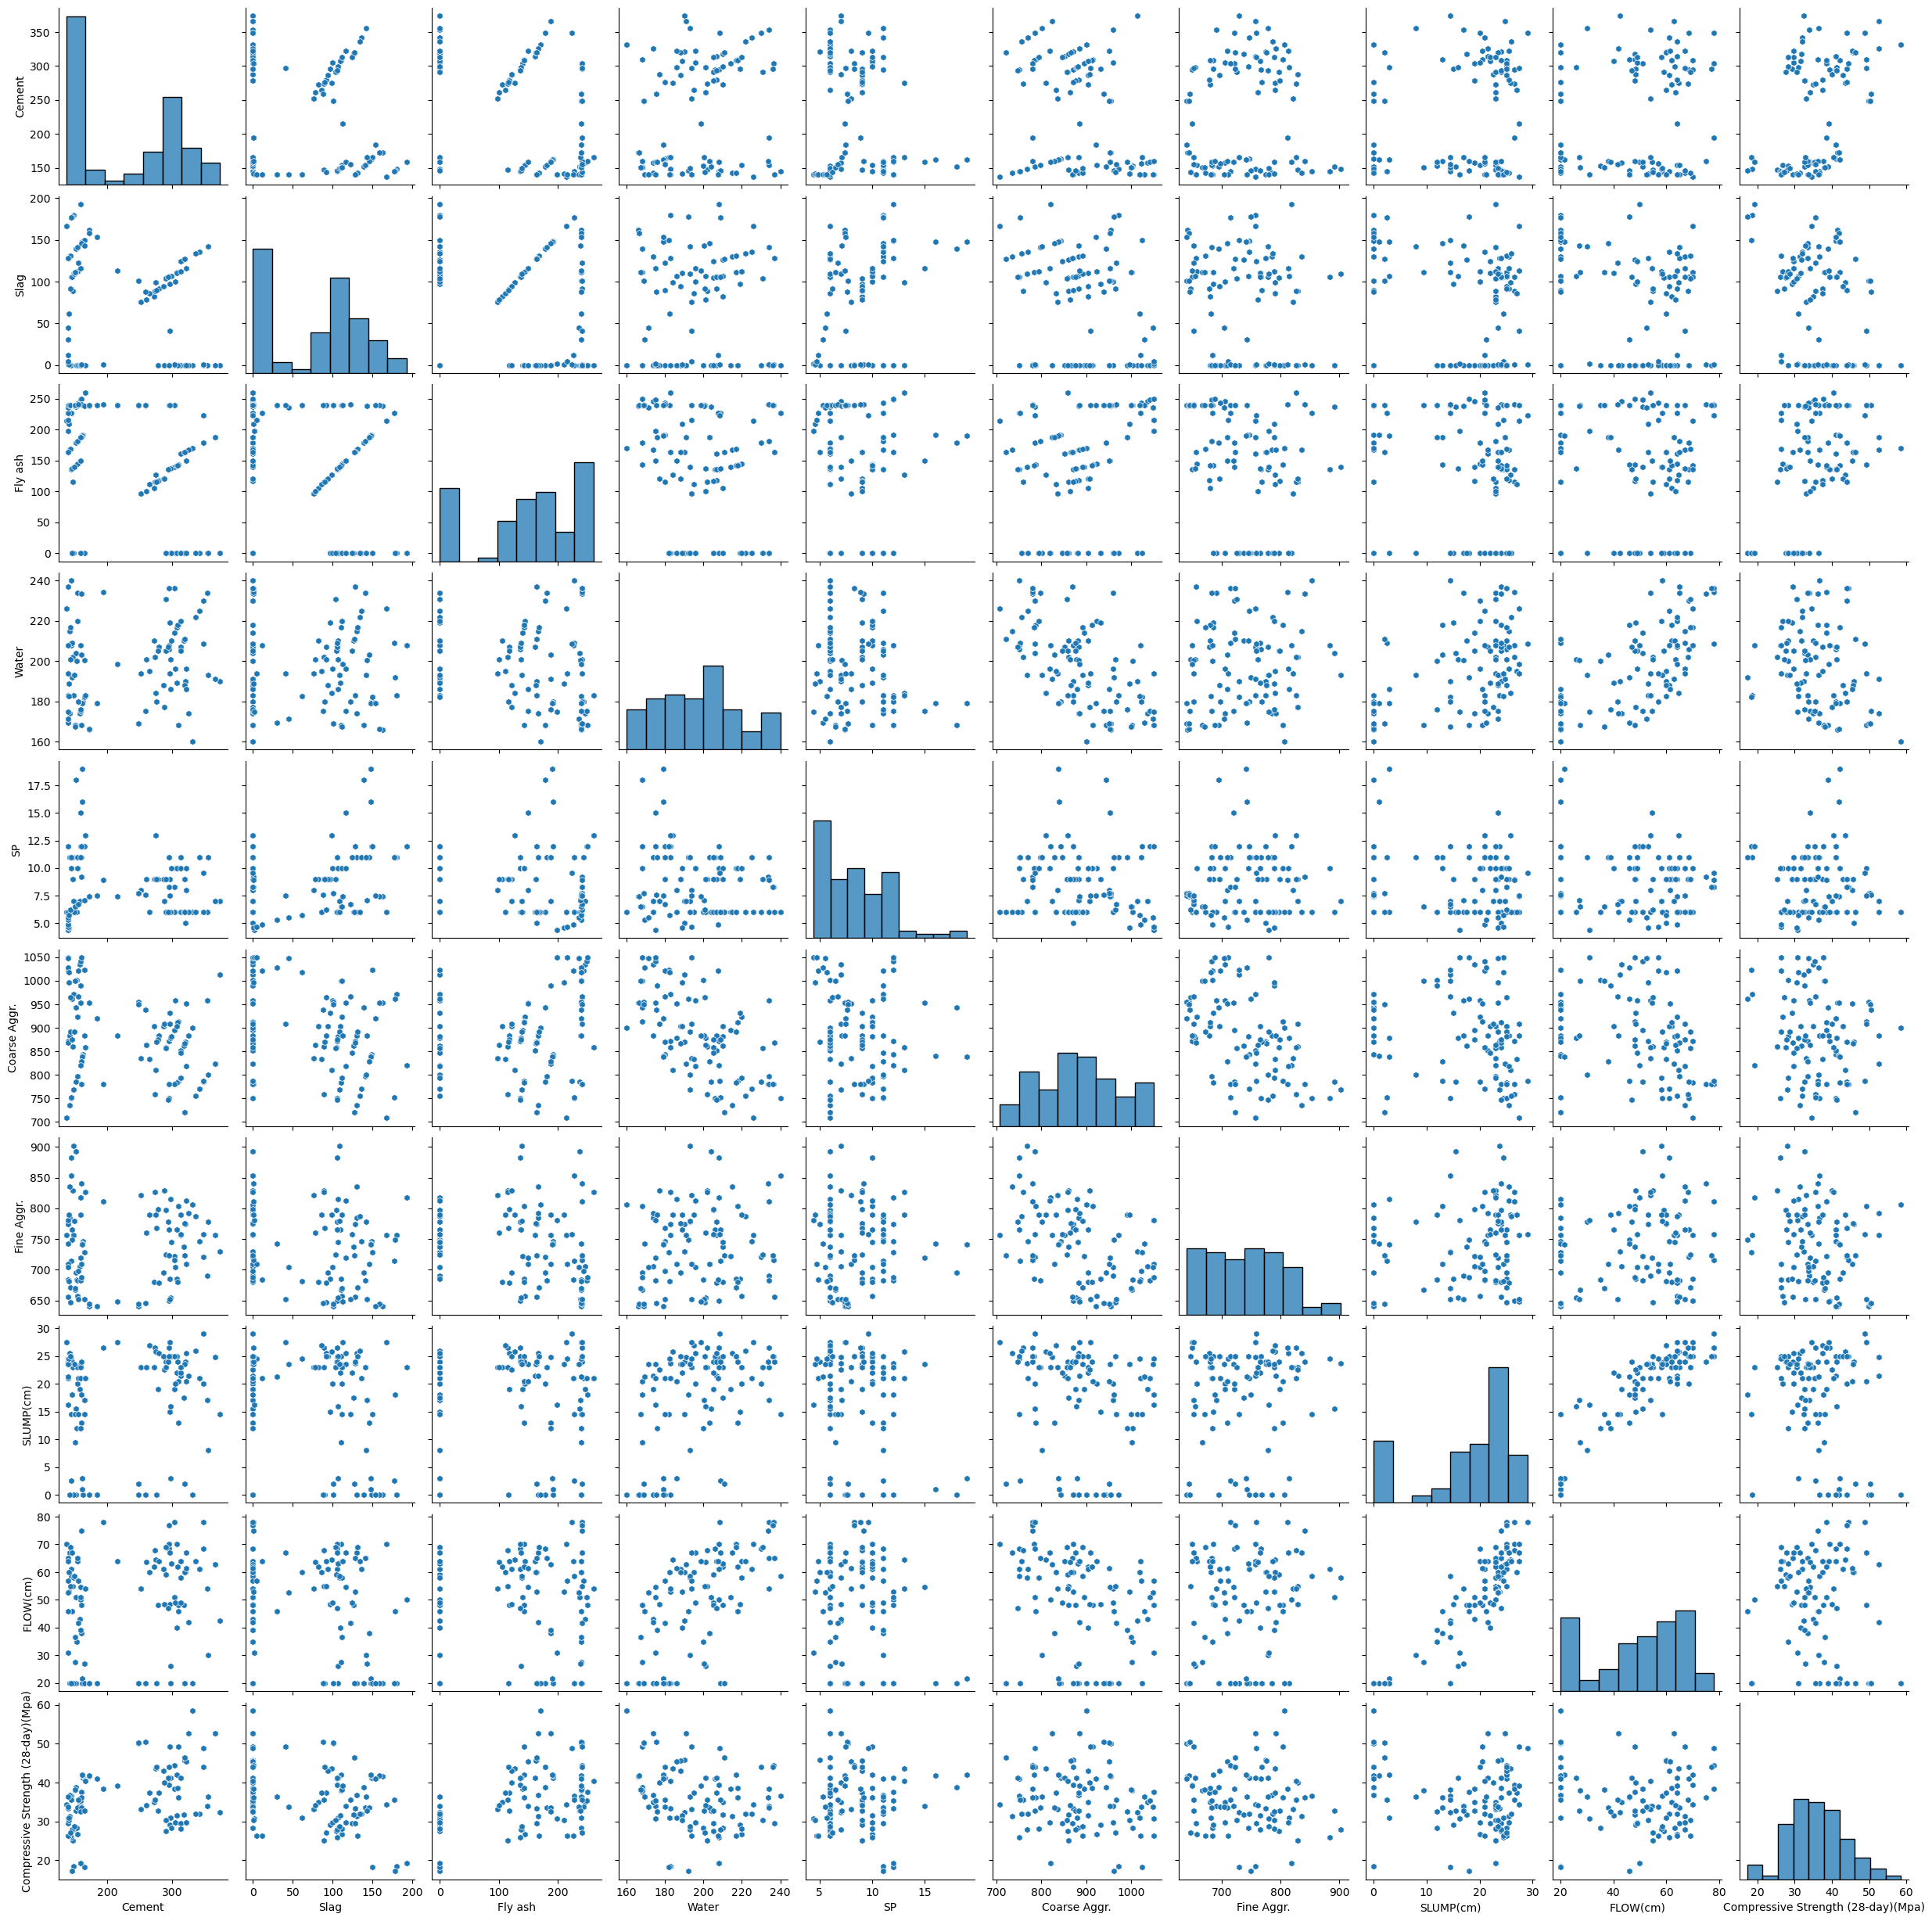

<Figure size 640x480 with 0 Axes>

In [8]:
#2 Pair plot
sns.pairplot(df,markers="h")
plt.show()
plt.savefig("figure.pdf")

Text(0.5, 1.0, 'Distribution of concrete flow')

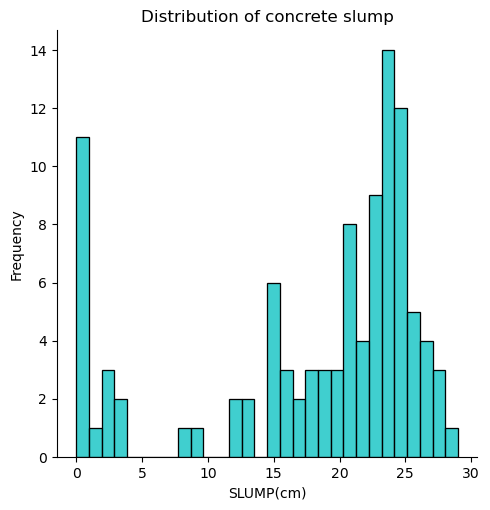

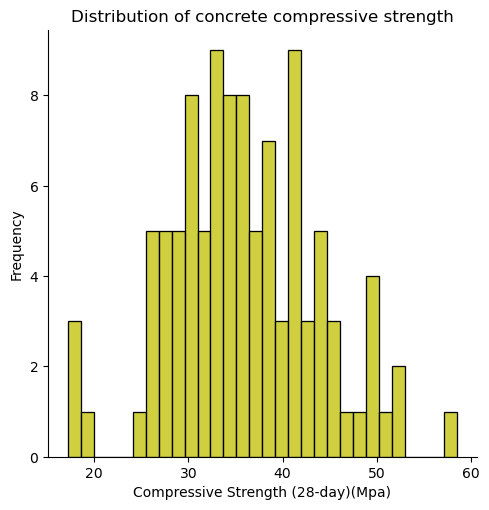

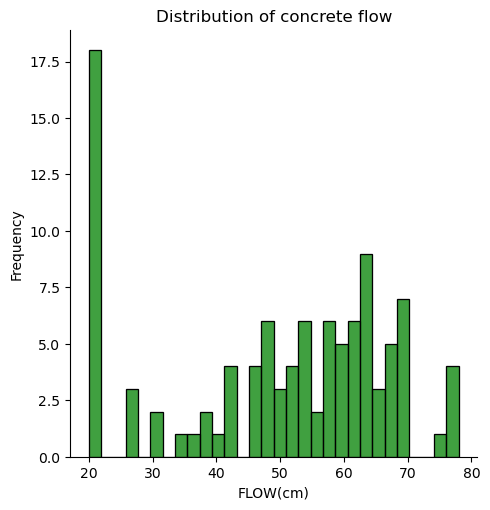

In [7]:
#3 Distribution plot

#3.1 Distribution of Concrete Slump
sns.displot(df['SLUMP(cm)'], bins=30, color='c')
plt.ylabel("Frequency")
plt.title('Distribution of concrete slump')

#3.2 Distribution of Compressive Strength
sns.displot(df['Compressive Strength (28-day)(Mpa)'], bins=30, color='y')
plt.ylabel("Frequency")
plt.title('Distribution of concrete compressive strength')

#3.3 Distribution of Concrete Flow
sns.displot(df['FLOW(cm)'], bins=30, color='g')
plt.ylabel("Frequency")
plt.title('Distribution of concrete flow')

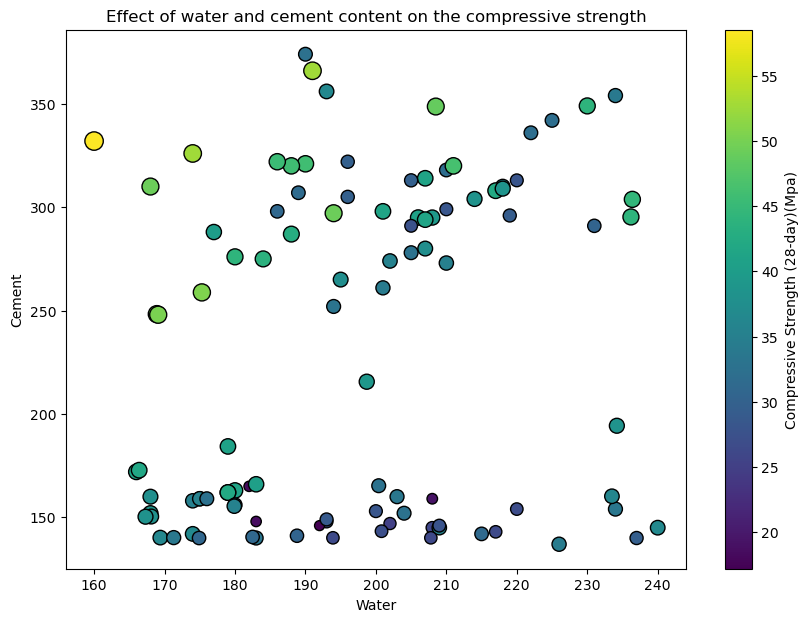

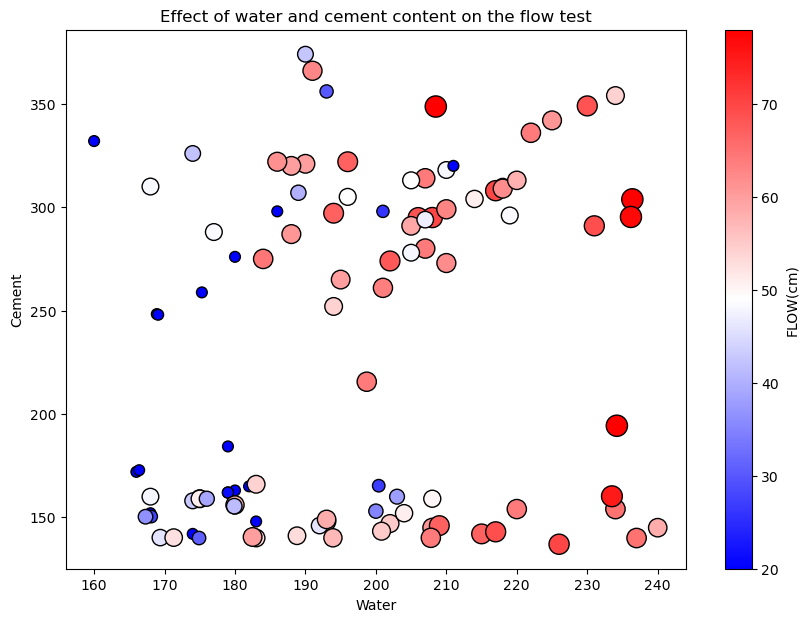

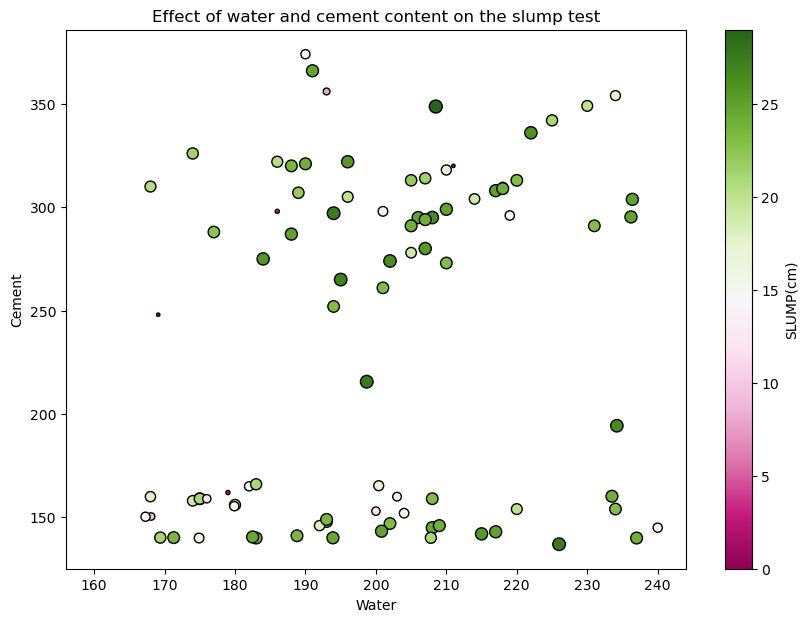

In [13]:
# 4. Scatterplot between components

#4.1 Effect on the compressive strength
fig = plt.figure(figsize=(10,7))
ax = fig.add_subplot(111)
plt.scatter(df["Water"],df["Cement"],
            c=df["Compressive Strength (28-day)(Mpa)"],s=df["Compressive Strength (28-day)(Mpa)"]*3,
            linewidth=1,edgecolor="k",cmap="viridis")
ax.set_facecolor("w")
ax.set_xlabel("Water")
ax.set_ylabel("Cement")
lab = plt.colorbar()
lab.set_label("Compressive Strength (28-day)(Mpa)")
plt.title("Effect of water and cement content on the compressive strength")
plt.show()

#4.2 Effect on the flow test
fig = plt.figure(figsize=(10,7))
ax = fig.add_subplot(111)
plt.scatter(df["Water"],df["Cement"],
            c=df["FLOW(cm)"],s=df["FLOW(cm)"]*3,
            linewidth=1,edgecolor="k",cmap="bwr")
ax.set_facecolor("w")
ax.set_xlabel("Water")
ax.set_ylabel("Cement")
lab = plt.colorbar()
lab.set_label("FLOW(cm)")
plt.title("Effect of water and cement content on the flow test")
plt.show()

#4.3 Effect on the slump test
fig = plt.figure(figsize=(10,7))
ax = fig.add_subplot(111)
plt.scatter(df["Water"],df["Cement"],
            c=df["SLUMP(cm)"],s=df["SLUMP(cm)"]*3,
            linewidth=1,edgecolor="k",cmap="PiYG")
ax.set_facecolor("w")
ax.set_xlabel("Water")
ax.set_ylabel("Cement")
lab = plt.colorbar()
lab.set_label("SLUMP(cm)")
plt.title("Effect of water and cement content on the slump test")
plt.show()

In [56]:
# 5. Compressive strength prediction

# 5.1 Data Splitting
# The dataset is divided into a 70 to 30 splitting between training data and test data

train,test = train_test_split(df,test_size =.3,random_state = 0)
train_X = train[[x for x in train.columns if x not in 
                 ["Compressive Strength (28-day)(Mpa)"]]]
train_Y = train["Compressive Strength (28-day)(Mpa)"]
test_X  = test[[x for x in train.columns if x not in 
                 ["Compressive Strength (28-day)(Mpa)"]]]
test_Y  = test["Compressive Strength (28-day)(Mpa)"]

# Data scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
#Scaling the training set
train_X = sc.fit_transform(train_X)
#Scaling the test set
test_X = sc.transform(test_X)

Accuracy of model is 0.8739386719657399
Mean Absolute Error: 2.145126353511952
Mean Squared Error: 7.675688805623602
Root Mean Squared Error: 2.770503348784044


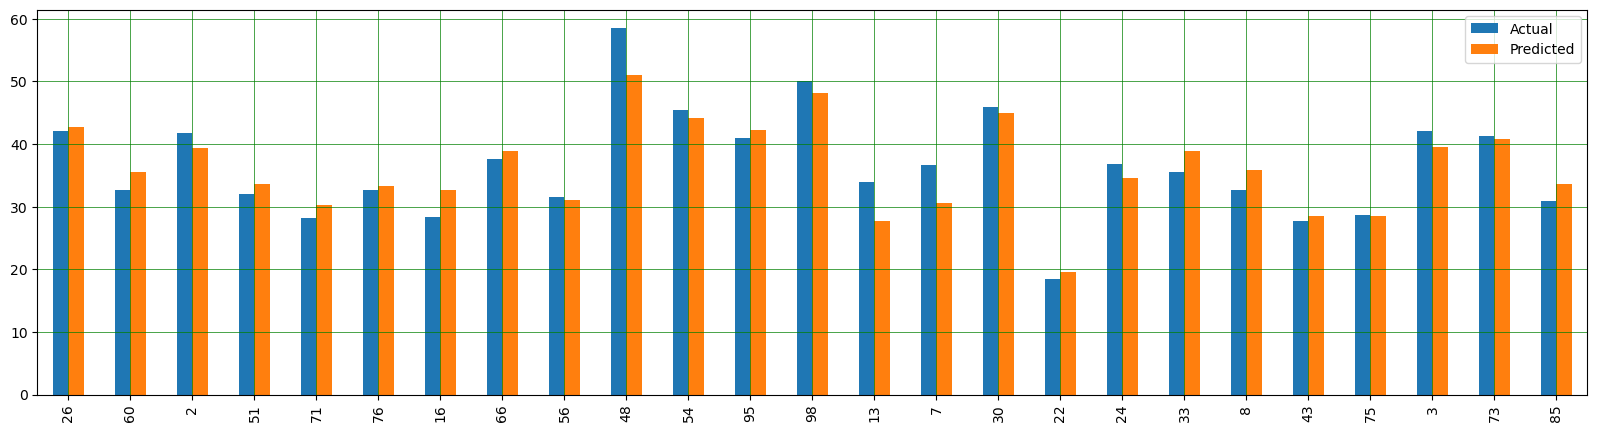

In [57]:
# 5.2 Modeling--Multiple linear regression
# 5.2.1 Fit a model
lm = LinearRegression()
model = lm.fit(train_X, train_Y)
predictions = lm.predict(test_X)
m1=model.score(test_X, test_Y)
RMSE1=np.sqrt(metrics.mean_squared_error(test_Y, predictions))
print('Accuracy of model is', model.score(test_X, test_Y))
print('Mean Absolute Error:', metrics.mean_absolute_error(test_Y, predictions))  
print('Mean Squared Error:', metrics.mean_squared_error(test_Y, predictions))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(test_Y, predictions)))


# 5.2.3 Plot of true value vs. predicted values
dat = pd.DataFrame({'Actual': test_Y, 'Predicted': predictions})
dat1=dat.head(25) #just a sample which shows top 25 columns
dat1.plot(kind='bar',figsize=(20,5))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

Accuracy of model is 0.862047782455975
Mean Absolute Error: 2.2352564207045074
Mean Squared Error: 8.399707574283605
Root Mean Squared Error: 2.898224900569934


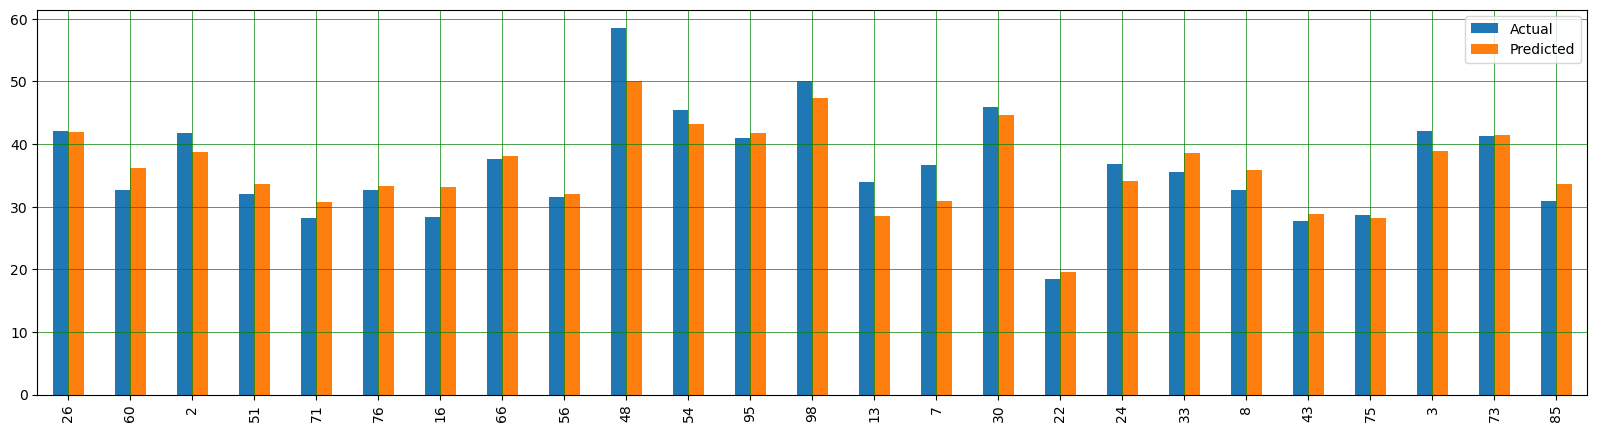

In [58]:
# 5.3 Modeling--LASSO Model
# 5.3.1 Fit a model
las = Lasso(alpha=0.1)
model2 = las.fit(train_X, train_Y)
predictions2 = las.predict(test_X)
m12=model2.score(test_X, test_Y)
RMSE12=np.sqrt(metrics.mean_squared_error(test_Y, predictions2))
print('Accuracy of model is', model2.score(test_X, test_Y))
print('Mean Absolute Error:', metrics.mean_absolute_error(test_Y, predictions2))  
print('Mean Squared Error:', metrics.mean_squared_error(test_Y, predictions2))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(test_Y, predictions2)))

# 5.3.2 Plot of true value vs. predicted values
dat = pd.DataFrame({'Actual': test_Y, 'Predicted': predictions2})
dat1=dat.head(25) #just a sample which shows top 25 columns
dat1.plot(kind='bar',figsize=(20,5))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

Accuracy of model is 0.8368394082263457
Mean Absolute Error: 2.474089032258077
Mean Squared Error: 9.93460839517414
Root Mean Squared Error: 3.15192138150274


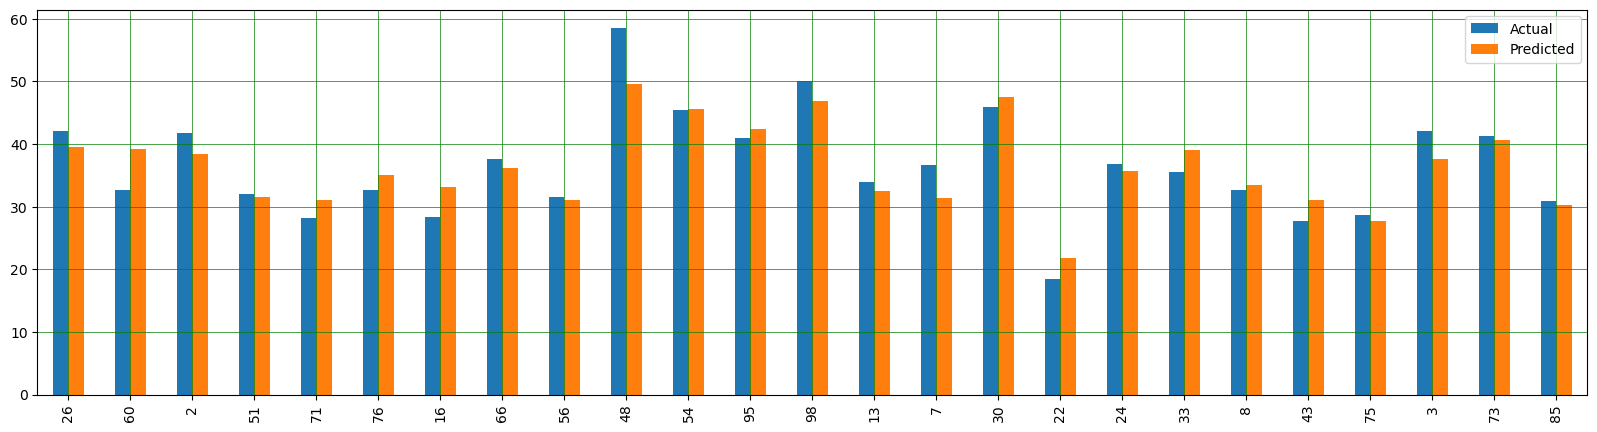

In [59]:
# 5.4 Modeling--Random forest regression
#5.4.1 Fit a model
from sklearn.ensemble import RandomForestRegressor
rf_reg = RandomForestRegressor(random_state=42, n_estimators=500)
regressor = rf_reg.fit(train_X, train_Y)
y_pred = regressor.predict(test_X)
print('Accuracy of model is',regressor.score(test_X, test_Y))
print('Mean Absolute Error:', metrics.mean_absolute_error(test_Y, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(test_Y, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(test_Y, y_pred)))

# 5.4.2 Plot of true value vs. predicted values
dat = pd.DataFrame({'Actual': test_Y, 'Predicted': y_pred})
dat1=dat.head(25) #just a sample which shows top 25 columns
dat1.plot(kind='bar',figsize=(20,5))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

In [61]:
# 6. Flow prediction

# 6.1 Data Splitting for flow test
# The dataset is divided into a 70 to 30 splitting between training data and test data
train,test = train_test_split(df,test_size =.3,random_state = 0)
train_X = train[[x for x in train.columns if x not in 
                 ["FLOW(cm)"]]]
train_Y = train["FLOW(cm)"]
test_X  = test[[x for x in train.columns if x not in 
                 ["FLOW(cm)"]]]
test_Y  = test["FLOW(cm)"]

# Data scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
#Scaling the training set
train_X = sc.fit_transform(train_X)
#Scaling the test set
test_X = sc.transform(test_X)

Accuracy of model is 0.8987887355460582
Mean Absolute Error: 4.554886016065926
Mean Squared Error: 30.868593108904253
Root Mean Squared Error: 5.555951143495077


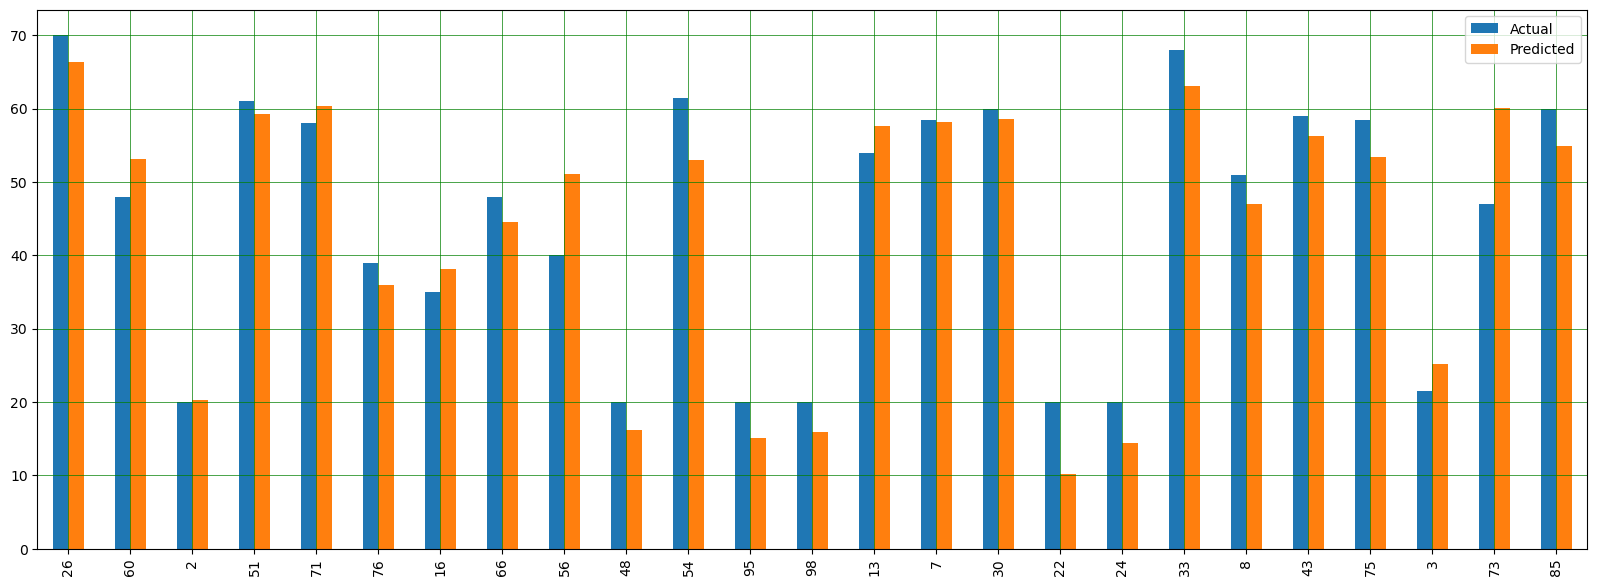

In [62]:
# 6.2 Modeling--Multiple linear regression
# 6.2.1 fit a model
lm = LinearRegression()
model = lm.fit(train_X, train_Y)
predictions = lm.predict(test_X)
m1=model.score(test_X, test_Y)
RMSE1=np.sqrt(metrics.mean_squared_error(test_Y, predictions))
print('Accuracy of model is', model.score(test_X, test_Y))
print('Mean Absolute Error:', metrics.mean_absolute_error(test_Y, predictions))  
print('Mean Squared Error:', metrics.mean_squared_error(test_Y, predictions))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(test_Y, predictions)))

# 6.2.3 Plot of true value vs. predicted values
dat = pd.DataFrame({'Actual': test_Y, 'Predicted': predictions})
dat1=dat.head(25) #just a sample which shows top 25 columns
dat1.plot(kind='bar',figsize=(20,7))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

Accuracy of model is 0.8994820133580589
Mean Absolute Error: 4.512460035692516
Mean Squared Error: 30.657149147547376
Root Mean Squared Error: 5.53688984426703


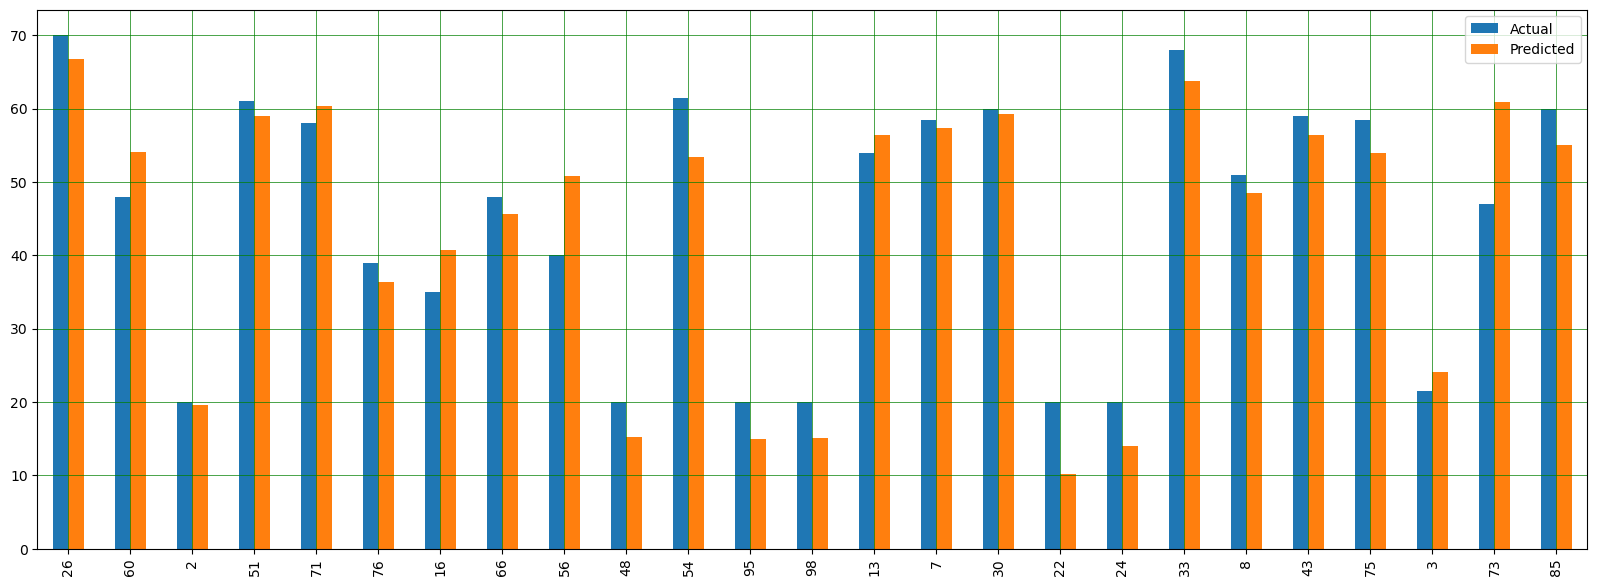

In [63]:
# 6.3 Modeling--LASSO Model
las = Lasso(alpha=0.1)
model2 = las.fit(train_X, train_Y)
predictions2 = las.predict(test_X)
m12=model2.score(test_X, test_Y)
RMSE12=np.sqrt(metrics.mean_squared_error(test_Y, predictions2))
print('Accuracy of model is', model2.score(test_X, test_Y))
print('Mean Absolute Error:', metrics.mean_absolute_error(test_Y, predictions2))  
print('Mean Squared Error:', metrics.mean_squared_error(test_Y, predictions2))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(test_Y, predictions2)))

# 6.3.2 Plot of true value vs. predicted values
dat = pd.DataFrame({'Actual': test_Y, 'Predicted': predictions2})
dat1=dat.head(25) #just a sample which shows top 25 columns
dat1.plot(kind='bar',figsize=(20,7))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

Accuracy of model is 0.853715353015691
Mean Absolute Error: 4.746819354838711
Mean Squared Error: 44.61559956
Root Mean Squared Error: 6.679490965635031


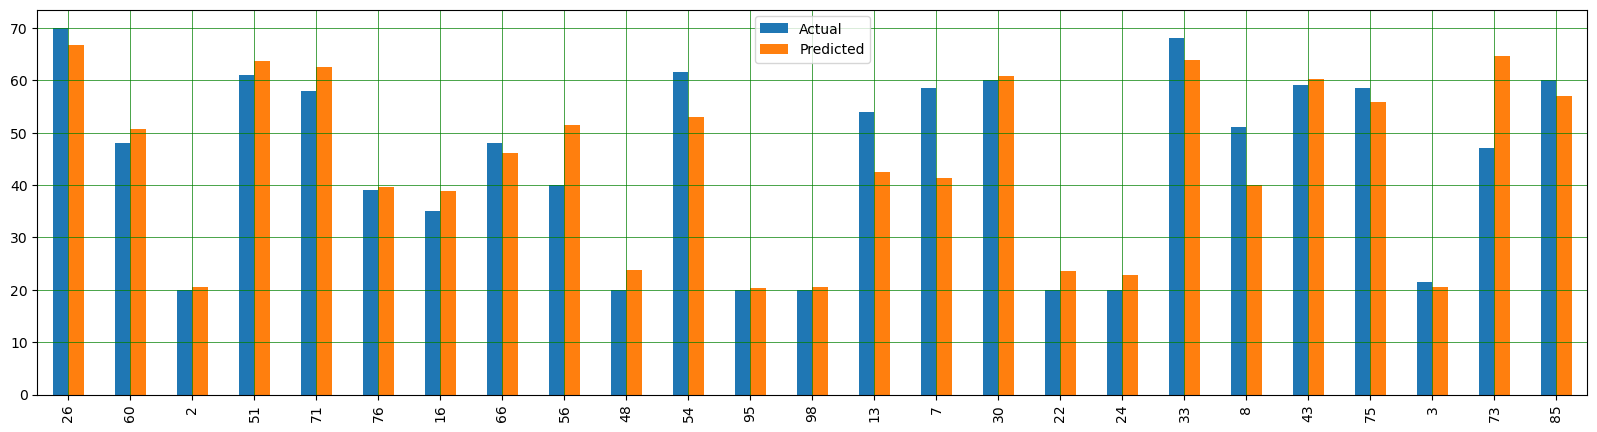

In [64]:
# 6.4 Modeling--Random forest regression
#6.4.1 Fit a model
from sklearn.ensemble import RandomForestRegressor
rf_reg = RandomForestRegressor(random_state=42, n_estimators=500)
regressor = rf_reg.fit(train_X, train_Y)
y_pred = regressor.predict(test_X)
print('Accuracy of model is',regressor.score(test_X, test_Y))
print('Mean Absolute Error:', metrics.mean_absolute_error(test_Y, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(test_Y, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(test_Y, y_pred)))

# 6.4.2 Plot of true value vs. predicted values
dat = pd.DataFrame({'Actual': test_Y, 'Predicted': y_pred})
dat1=dat.head(25) #just a sample which shows top 25 columns
dat1.plot(kind='bar',figsize=(20,5))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

In [65]:
# 7. Slump prediction

# 7.1 Data Splitting for flow test
# The dataset is divided into a 70 to 30 splitting between training data and test data
train,test = train_test_split(df,test_size =.3,random_state = 0)
train_X = train[[x for x in train.columns if x not in 
                 ["SLUMP(cm)"]]]
train_Y = train["SLUMP(cm)"]
test_X  = test[[x for x in train.columns if x not in 
                ["SLUMP(cm)"]]]
test_Y  = test["SLUMP(cm)"]

# Data scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
#Scaling the training set
train_X = sc.fit_transform(train_X)
#Scaling the test set
test_X = sc.transform(test_X)

Accuracy of model is 0.8603878077264758
Mean Absolute Error: 2.811798217977941
Mean Squared Error: 13.024738849704999
Root Mean Squared Error: 3.608980306084393


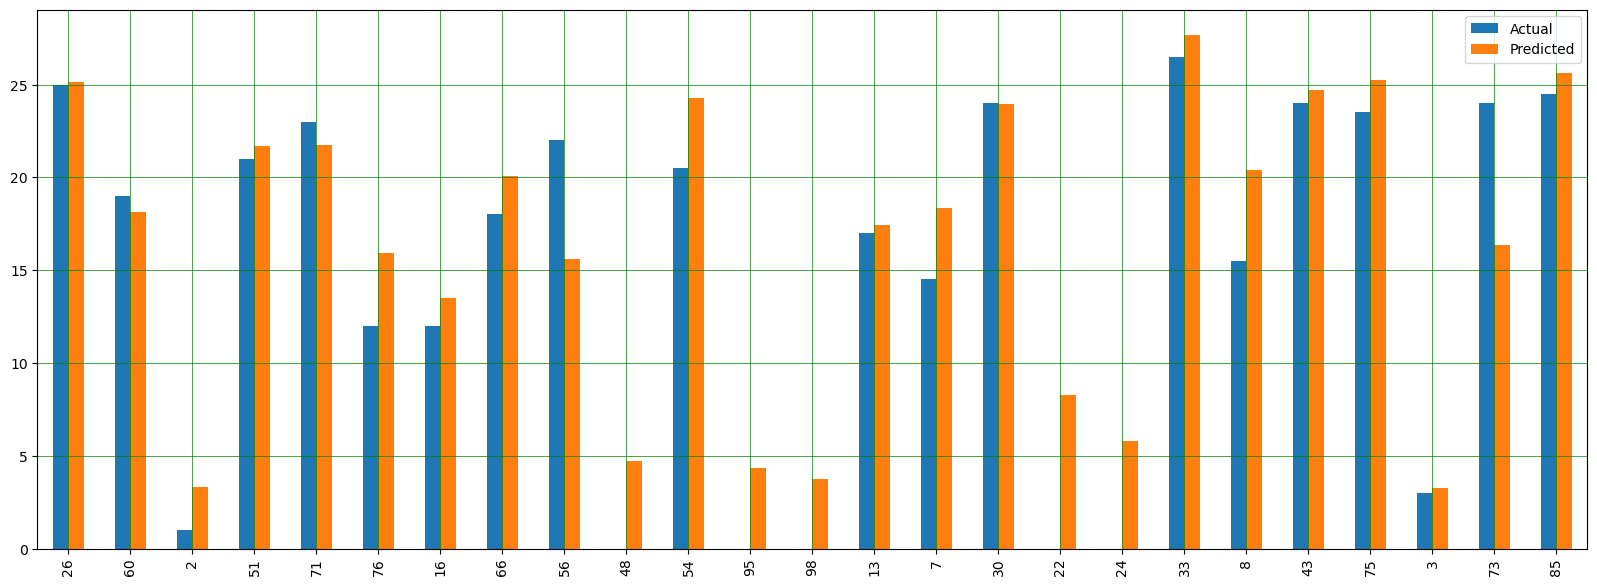

In [71]:
# 7.2 Modeling--Multiple linear regression
# 7.2.1 fit a model
lm = LinearRegression()
model = lm.fit(train_X, train_Y)
predictions = lm.predict(test_X)
m1=model.score(test_X, test_Y)
RMSE1=np.sqrt(metrics.mean_squared_error(test_Y, predictions))
print('Accuracy of model is', model.score(test_X, test_Y))
print('Mean Absolute Error:', metrics.mean_absolute_error(test_Y, predictions))  
print('Mean Squared Error:', metrics.mean_squared_error(test_Y, predictions))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(test_Y, predictions)))

# 7.2.3 Plot of true value vs. predicted values
dat = pd.DataFrame({'Actual': test_Y, 'Predicted': predictions})
dat1=dat.head(25) #just a sample which shows top 25 columns
dat1.plot(kind='bar',figsize=(20,7))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

Accuracy of model is 0.8495936782255855
Mean Absolute Error: 2.8911803019230287
Mean Squared Error: 14.031747733166636
Root Mean Squared Error: 3.7458974536373306


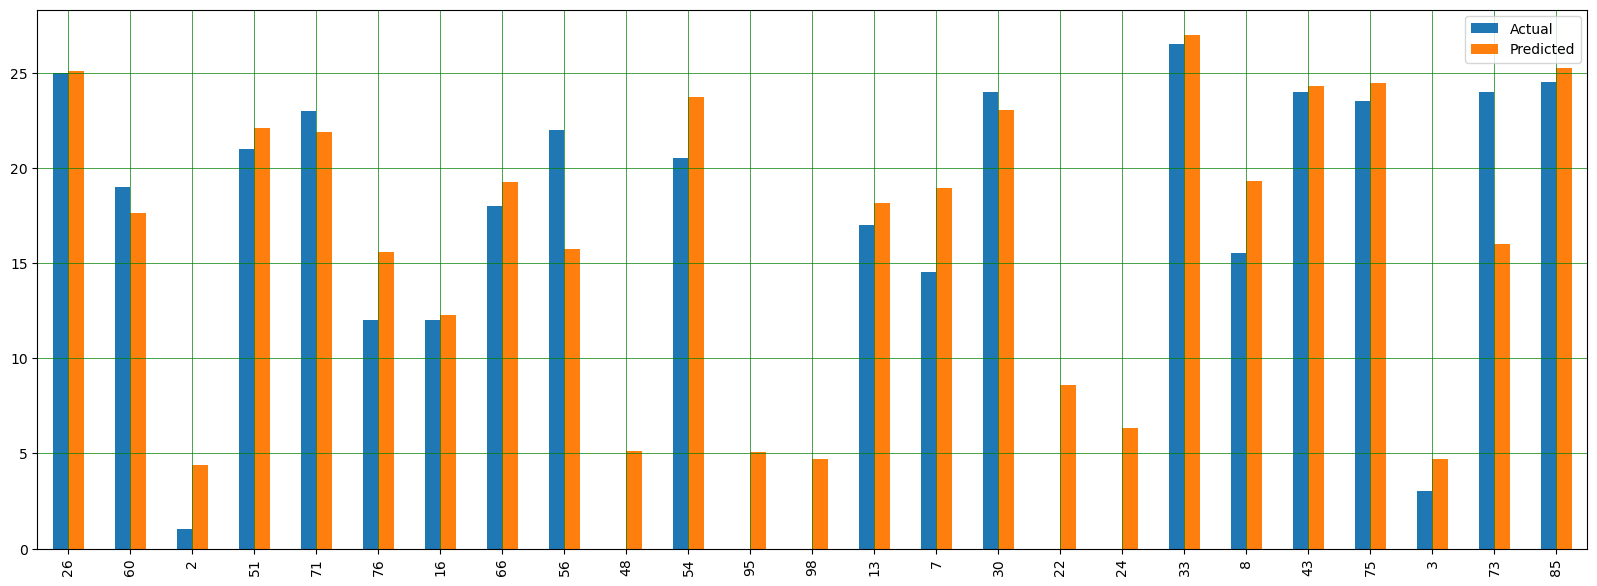

In [67]:
# 7.3 Modeling--LASSO Model
las = Lasso(alpha=0.1)
model2 = las.fit(train_X, train_Y)
predictions2 = las.predict(test_X)
m12=model2.score(test_X, test_Y)
RMSE12=np.sqrt(metrics.mean_squared_error(test_Y, predictions2))
print('Accuracy of model is', model2.score(test_X, test_Y))
print('Mean Absolute Error:', metrics.mean_absolute_error(test_Y, predictions2))  
print('Mean Squared Error:', metrics.mean_squared_error(test_Y, predictions2))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(test_Y, predictions2)))

# 7.3.2 Plot of true value vs. predicted values
dat = pd.DataFrame({'Actual': test_Y, 'Predicted': predictions2})
dat1=dat.head(25) #just a sample which shows top 25 columns
dat1.plot(kind='bar',figsize=(20,7))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

Accuracy of model is 0.8710065925036704
Mean Absolute Error: 2.5556129032258075
Mean Squared Error: 12.034088274193548
Root Mean Squared Error: 3.4690183444590703


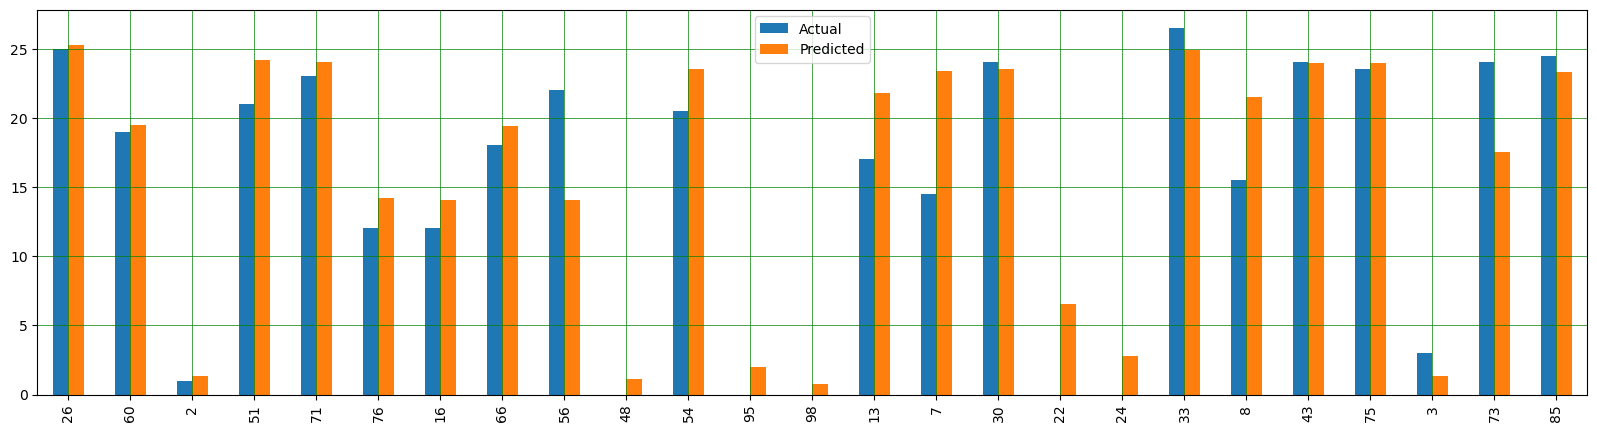

In [68]:
# 7.4 Modeling--Random forest regression
#7.4.1 Fit a model
from sklearn.ensemble import RandomForestRegressor
rf_reg = RandomForestRegressor(random_state=42, n_estimators=500)
regressor = rf_reg.fit(train_X, train_Y)
y_pred = regressor.predict(test_X)
print('Accuracy of model is',regressor.score(test_X, test_Y))
print('Mean Absolute Error:', metrics.mean_absolute_error(test_Y, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(test_Y, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(test_Y, y_pred)))

# 7.4.2 Plot of true value vs. predicted values
dat = pd.DataFrame({'Actual': test_Y, 'Predicted': y_pred})
dat1=dat.head(25) #just a sample which shows top 25 columns
dat1.plot(kind='bar',figsize=(20,5))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()